# FLIP (02) Optimization Data Science

---
Team Director: Meng Ren | mren@tulip.academy<br />

TULIP Academy <br />
http://www.tulip.academy 

---

Runge-Kutta methods
===================

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
rcParams['figure.figsize'] = (12,6)

Considering IVPs of the form

$${\boldsymbol{y}}'(x) = {\boldsymbol{f}}(x, {\boldsymbol{y}}(x)).$$

We looked at multistage (e.g. Runge-Kutta) methods. These

-   self start,

-   compute next iteration by combining estimates of ${\boldsymbol{f}}$

to improve order of accuracy.

Methods constructed by matching terms in Taylor expansion; ensures local
truncation error is a certain order. May improve efficiency by checking
if results are “good enough” at given $h$.

### Comparing errors

Use $y_e(x_0 + h)$ as the *exact* solution to

$$y'(x) = f(x, y(x)), \quad y(x_0) = y_0.$$

Consider numerical solution $y_h(x_0 + h)$ for one step (many stages) of
a multistage method. By construction the Taylor expansion implies

$$| y_e(x_0 + h) - y_h(x_0 + h) | = C h^{s+1}.$$

Know that method has order $s$; to compute error also
need $C$.

Can use Richardson extrapolation variant: compare the error with two
different step sizes.


By assumption taking two steps of size $h/2$ gives

$$| y_e(x_0 + h) - y_{h/2}(x_0 + h) | = 2 C (h/2)^{s+1}.$$


Rearranging gives

$$\text{Local truncation error} = C h^{s+1} = \frac{y_h - y_{h/2}}{1 - 2^{-s}}.$$

### Adaptive stepping

Given a computable estimate of the error, decide whether our result is
sufficiently accurate automatically. As with adaptive quadrature, can
modify $h$ where necessary.

Two key differences between algorithms for quadrature and IVPs.

1.  IVP step depends on previous step: $h_1$ at $x_1$ different from $h_0$ at $x_0$.

    Expect accuracy depends on local properties ($\lambda \sim
    |\partial_y f|$); always use latest $h_1$, not initial $h_0$.

    Must *increase* $h$ when accuracy sufficient.

2.  Richardson extrapolation expensive (3 times original algorithm).

Instead combine estimates in different ways to estimate error
(e.g. RKF45: 6 evaluations, $4^{\text{th}}$ order update and
$5^{\text{th}}$ order error check).

RKF45 seems optimal for number of function evaluations:

| Number of function evaluations | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 |
|:------------------------------:|---|---|---|---|---|---|---|---|
| Maximum order of R-K method    | 1 | 2 | 3 | 4 | 4 | 5 | 6 | 6 |

Multistep Methods
=================

Loosely a multistage method approximates $y'$ in

$$y'(x) = f(x, y(x)), \quad y(x_0) = y_0.$$

Loosely a *multistep* method approximates the quadrature solution

$$y_{n+1} - y_n = \int_{x_n}^{x_{n+1}} f(x, y(x)) \, d x.$$

Difference comes from interpretation and assumption: that the quadrature
can be well approximated using a formula depending on $y_{n-j}$ (and
$x_{n-j}$). This gives the general formula

$$a_k y_{n+1} + a_{k-1} y_n + \dots + a_0 y_{n+1-k} = h \left[ b_k f_{n+1} + b_{k-1} f_n + \dots + b_0 f_{n+1-k} \right].$$

### $k$-step methods

In a *$k$-step method*

$$a_k y_{n+1} + a_{k-1} y_n + \dots + a_0 y_{n+1-k} = h \left[ b_k f_{n+1} + b_{k-1} f_n + \dots + b_0 f_{n+1-k} \right]$$

all terms on the left (except $y_{n+1}$) are known, and all terms on the
right (except $f_{n+1}$) are computable. The coefficients $a_m,
  b_m$ fix the method.

To give $y_{n+1}$ (essential!) must have $a_k \neq 0$.

If $b_k = 0$ can directly compute $y_{n+1}$; the method is *explicit*.

If $b_k \neq 0$ then required $f_{n+1}$ is not computable; the method is
*implicit*. Either

1.  use iteration to solve nonlinear equation, *or*

2.  use predictor-corrector method (usual approach).

Adams-Bashforth methods
-----------------------

The Adams-Bashforth methods are explicit $k$-step methods with formula

$$y_{n+1} - y_n = h \left[ b_{k-1} f_n + b_{k-2} f_{n-1} + \dots \right]$$

based on evenly spaced points $x_j$.

To compute the coefficients, require that the method is “as accurate as
possible”; i.e., that it is exact for as many polynomials as possible.

### Adams-Bashforth methods: example

For example, the 2-step method

$$y_{n+1} - y_n = h \left[ b_1 f_n + b_0 f_{n-1} \right]$$

should be exact for polynomials of degree 0, 1. Approximate

\begin{align}
  y_{n+1} - y_n & = \int_{x_n}^{x_{n+1}} f(x, y(x)) \, dx \\
  & \simeq h \left[ b_1 f_n + b_0 f_{n-1} \right].
\end{align}

Insist the formula holds for $f(x) = p_m(x) = x^m$ for $m = 0, 1$.

Without loss of generality choose $x_n = 0$, $x_{n-1} = -h$:

\begin{align}
  p_0 & = 1: & h & = h \left[ b_1 + b_0 \right] \\
  p_1 & = x: & h^2 / 2 & = h \left[ -h b_0 \right].
\end{align}

Hence $b_0 = -1 / 2$, $b_1 = 3 / 2$.

### Standard example

Apply the 2 step Adams-Bashforth method to

$$y'(x) = - \sin(x), \quad y(0) = 1$$

and integrate to $x = 0.5$. Use Euler predictor-corrector to start
algorithm. Using $h = 0.1$ gives

|$n$|$x_n$|$y_n$|$f(x_n, y_n)$|$\cos(x_n)$|
|---|-----|-----|-------------|-----------|
|0  | 0.0 |1.000| 0.000       | 1.000     |
|1  | 0.1 |0.995| -0.100      | 0.995     |
|2  | 0.2 |0.980| -0.199      | 0.980     |
|3  | 0.3 |0.955| -0.296      | 0.955     |
|4  | 0.4 |0.921| -0.389      | 0.921     |
|5  | 0.5 |0.877|             | 0.878     |

The error is $0.4\%$, just visible at this precision. With $h =
  0.01$ the error is $0.006\%$. Convergence is nearly second order;
result is slightly biased by the starting method.

In [3]:
def ab2_method(f, x_end, y0, N):
    """Solve IVP y'=f(x, y(x)) on x \in [0, x_end] with y(0) = y0 using N+1 points, using 2nd order Adams-Bashforth method."""
    
    h = x_end / N
    x = np.linspace(0.0, x_end, N+1)
    
    y = np.zeros((N+1, len(y0)))
    fn = np.zeros_like(y)
    y[0, :] = y0
    
    # Start using Euler predictor-corrector step
    fn[0, :] = f(x[0], y[0, :])
    yp = y[0, :] + h * fn[0, :]
    y[1, :] = y[0, :] + h / 2.0 * (fn[0, :] + f(x[1], yp))
    
    for n in range(1, N):
        fn[n, :] = f(x[n], y[n, :])
        y[n+1, :] = y[n, :] + h / 2.0 * (3.0 * fn[n, :] - fn[n-1, :])
        
    return x, y

def fn_simple(x, y):
    """Simple function for example"""
    
    return -np.sin(x)

# Example given above
x_5, y_5 = ab2_method(fn_simple, 0.5, [1.0], 5)
x_50, y_50 = ab2_method(fn_simple, 0.5, [1.0], 50)

print("Solution at x = 0.5 using h = 0.1 is y = {}.".format(y_5[-1, 0]))
print("Solution at x = 0.5 using h = 0.01 is y = {}.".format(y_50[-1, 0]))

Solution at x = 0.5 using h = 0.1 is y = 0.8771932824110381.
Solution at x = 0.5 using h = 0.01 is y = 0.8775775811228846.


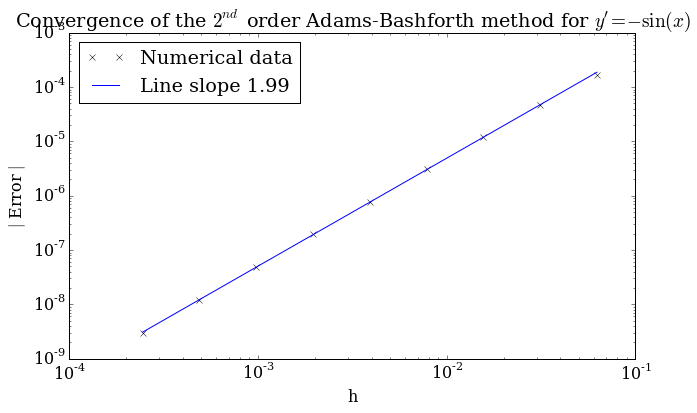

In [4]:
Npoints = np.array([2**i for i in range(3, 12)])
h = 0.5 / Npoints
err = np.zeros_like(h)

for i in range(len(Npoints)):
    N = Npoints[i]
    x, y = ab2_method(fn_simple, 0.5, [1.0], N)
    err[i] = np.abs(np.cos(0.5) - y[-1, 0])

# Find the best fit to the data: if err ~ A h^s then the best fit straight line of log(err) vs log(h) has slope s.
p = np.polyfit(np.log(h[1:]), np.log(err[1:]), 1)
    
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.loglog(h, err, 'kx', label = 'Numerical data')
ax.loglog(h, np.exp(p[1])*h**(p[0]), 'b-', label = "Line slope {:.2f}".format(p[0]))
ax.set_xlabel('h')
ax.set_ylabel('$\|$ Error $\|$')
ax.set_title("Convergence of the $2^{nd}$ order Adams-Bashforth method for $y' = -\sin(x)$")
ax.legend(loc = 2)
fig.tight_layout()
plt.show()

### Standard Example: 2

Consider the system

$$\left\{
\begin{aligned}
  \dot{x} & = -y \\ \dot{y} & = x
\end{aligned} \right., \quad x(0) = 1, \, \, y(0) = 0.$$

In polar coordinates this is $\dot{r} = 0$, $\dot{\phi} = 1$.

Use Adams-Bashforth 2 step method with $h=0.1$. At
$t=500$ the result matches the correct answer to the eye. 
The growth of the radius makes the errors visible.

Use Adams-Bashforth 2 step method with $h=0.01$. At
$t=500$ the result matches the correct answer to the eye.

Looking at the growth of the radius makes the errors visible even now.

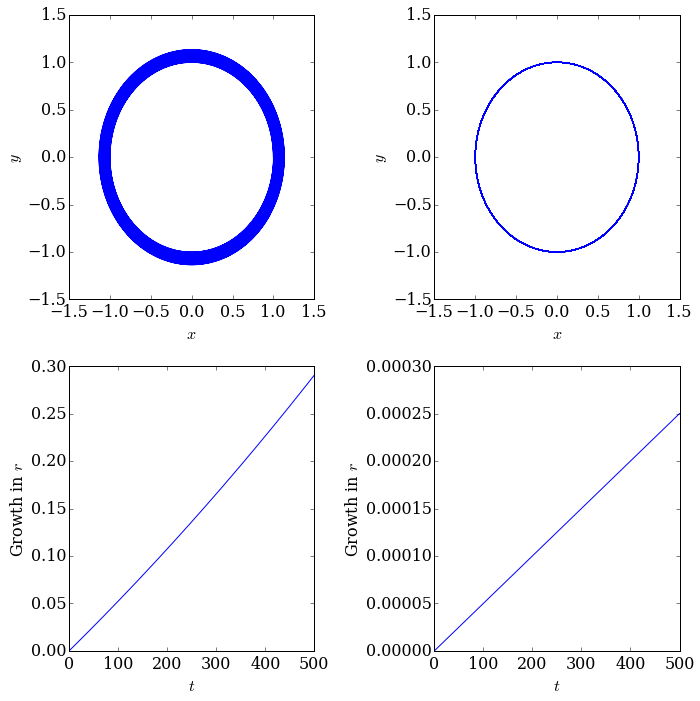

In [5]:
def fn_circular_motion(x, y):
    """Simple function for Euler's method example"""
    
    dfdt = np.zeros_like(y)
    dfdt[0] = -y[1]
    dfdt[1] =  y[0]
    
    return dfdt

# Example given above
y0 = np.array([1.0, 0.0])
t_0_1, y_0_1 = ab2_method(fn_circular_motion, 500.0, y0, 5000)
t_0_01, y_0_01 = ab2_method(fn_circular_motion, 500.0, y0, 50000)

fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(221)
ax1.plot(y_0_1[:, 0], y_0_1[:, 1], 'b-', label = '$h = 0.1$')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax2 = fig.add_subplot(222)
ax2.plot(y_0_01[:, 0], y_0_01[:, 1], 'b-', label = '$h = 0.01$')
ax2.set_xlabel('$x$')
ax2.set_ylabel('$y$')
ax3 = fig.add_subplot(223)
ax3.plot(t_0_1, np.abs(y_0_1[:, 0]**2 + y_0_1[:, 1]**2 - 1.0), 'b-', label = '$h = 0.1$')
ax3.set_xlabel('$t$')
ax3.set_ylabel('Growth in $r$')
ax4 = fig.add_subplot(224)
ax4.plot(t_0_01, np.abs(y_0_01[:, 0]**2 + y_0_01[:, 1]**2 - 1.0), 'b-', label = '$h = 0.01$')
ax4.set_xlabel('$t$')
ax4.set_ylabel('Growth in $r$')
fig.tight_layout()
plt.show()

### Higher order Adams-Bashforth

Principle behind higher order Adams-Bashforth methods the same; solve
for the coefficients by integrating

$$y_{n+1} - y_n = h \left[ b_k f_n + b_{k-1} f_{n-1} + \dots b_0
f_{n + 1 - k} \right]$$

over the range, assuming $f(x) = p_s(x)$ for polynomials of degree
$s = 0, \dots k$.

Easiest to choose as a basis for the polynomials

$$p_{s+1}(x) = x (x + h) \dots (x + h s)$$

as $p_{s+1}$ vanishes at $x = 0, -h, \dots, -h s$. Then choose
$x_n = 0, x_{n - 1} = -h$ and so on: the resulting system of equations
is in upper-triangular form – solve by back substitution.

### Higher order Adams-Bashforth example

For example, the Adams-Bashforth method of order five has formula

$$y_{n+1} - y_n = h \left[ b_4 f_n + b_3 f_{n-1} + b_2 f_{n-2} + b_1 f_{n-3} + b_0 f_{n-4} \right] ,$$

and the coefficients follow from

\begin{align}
p_0 & = 1: & h & = h \left[ b_4 + b_3 + b_2 + b_1 + b_0 \right] \\
p_1 & = x: & \frac{h^2}{2} & = h \left[ -h \left( b_3 + 2 b_2 + 3
    b_1 + 4 b_0 \right) \right] \\
p_2 & = x (x + h): & 5 \frac{h^3}{6} & = h \left[ h^2 \left( 2 b_2
    + 6 b_1 + 12 b_0 \right) \right] \\ 
p_3 & = x (x + h) (x + 2 h): & 9 \frac{h^4}{4} & = h \left[ -h^3
  \left( 6 b_1 + 24 b_0 \right) \right] \\
p_4 & = x (x + h) (x + 2 h) (x + 3 h): & 251 \frac{h^5}{30} & = h
\left[ 24 h^4 b_0 \right].
\end{align}

### Standard example

Apply the 5 step Adams-Bashforth method to

$$y'(x) = - \sin(x), \quad y(0) = 1$$

and integrate to $x = 0.5$. Use RK4 method to start algorithm. Using
$h = 0.05$ gives


|$n$|$x_n$|$y_n$|$f(x_n, y_n)$|$\cos(x_n)$|
|---|-----|-----|-------------|-----------|
|0 | 0.0 | 1.000 | 0.000 | 1.000|
|2 | 0.1 | 0.995 | -0.100 | 0.995|
|4 | 0.2 | 0.980 | -0.199 | 0.980|
|6 | 0.3 | 0.955 | -0.296 | 0.955|
|8 | 0.4 | 0.921 | -0.389 | 0.921|
|10 |0.5 |0.878| |0.878|

The error is $3 \times 10^{-6}\%$, not visible at this precision. With
$h = 0.01$ the error is $2 \times 10^{-9}\%$. Convergence is slightly
worse than fifth order; result is slightly biased by the starting
method.

In [6]:
def ab5_method(f, x_end, y0, N):
    """Solve IVP y'=f(x, y(x)) on x \in [0, x_end] with y(0) = y0 using N+1 points, using 5th order Adams-Bashforth method."""
    
    h = x_end / N
    x = np.linspace(0.0, x_end, N+1)
    
    y = np.zeros((N+1, len(y0)))
    fn = np.zeros_like(y)
    y[0, :] = y0
    
    # Start using RK4 steps
    for n in range(4):
        fn[n, :] = f(x[n], y[n, :])
        k1 = h * fn[n, :]
        k2 = h * f(x[n] + h / 2.0, y[n, :] + k1 / 2.0)
        k3 = h * f(x[n] + h / 2.0, y[n, :] + k2 / 2.0)
        k4 = h * f(x[n] + h, y[n, :] + k3)
        y[n+1, :] = y[n, :] +  (k1 + k4 + 2.0 * (k2 + k3)) / 6.0
    
    # Solve for the coefficients
    
    coeff_A = np.array([[1.0, 1.0, 1.0, 1.0, 1.0],[0.0, -1.0, -2.0, -3.0, -4.0],[0.0, 0.0, 2.0, 6.0, 12.0],
                        [0.0, 0.0, 0.0, -6.0, -24.0],[0.0, 0.0, 0.0, 0.0, 24.0]])
    coeff_b = np.array([1.0, 1.0 / 2.0, 5.0/6.0, 9.0/4.0, 251.0/30.0])
    b = np.linalg.solve(coeff_A, coeff_b)
    
    for n in range(4, N):
        fn[n, :] = f(x[n], y[n, :])
        y[n+1, :] = y[n, :] + h * (b[0]*fn[n, :] + b[1]*fn[n-1, :] + b[2]*fn[n-2, :] + b[3]*fn[n-3, :] + b[4]*fn[n-4, :])
        
    return x, y

def fn_simple(x, y):
    """Simple function for example"""
    
    return -np.sin(x)

# Example given above
x_5, y_5 = ab5_method(fn_simple, 0.5, [1.0], 5)
x_50, y_50 = ab5_method(fn_simple, 0.5, [1.0], 50)

print("Solution at x = 0.5 using h = 0.1 is y = {}.".format(y_5[-1, 0]))
print("Error at x = 0.5 using h = 0.1 is y = {}.".format(abs(np.cos(0.5) - y_5[-1, 0])))
print("Solution at x = 0.5 using h = 0.01 is y = {}.".format(y_50[-1, 0]))
print("Error at x = 0.5 using h = 0.01 is y = {}.".format(abs(np.cos(0.5) - y_50[-1, 0])))

Solution at x = 0.5 using h = 0.1 is y = 0.8775828784830745.
Error at x = 0.5 using h = 0.1 is y = 3.165927017212411e-07.
Solution at x = 0.5 using h = 0.01 is y = 0.8775825619049437.
Error at x = 0.5 using h = 0.01 is y = 1.4570900042087942e-11.


### Standard Example: 2

Consider the system

$$
\left\{
\begin{aligned}
  \dot{x} & = -y \\ \dot{y} & = x
\end{aligned} \right., \quad x(0) = 1, \, \, y(0) = 0.
$$

In polar coordinates this is $\dot{r} = 0$, $\dot{\phi} = 1$.

Use the Adams-Bashforth 5 step method with $h=0.1$. At
$t=500$ the result matches the correct answer to the eye. 

Looking at the growth of the radius makes the errors visible.

Use Adams-Bashforth 5 step method with $h=0.01$. At
$t=500$ the result matches the correct answer to the eye.

Looking at the growth of the radius makes the errors visible even now.

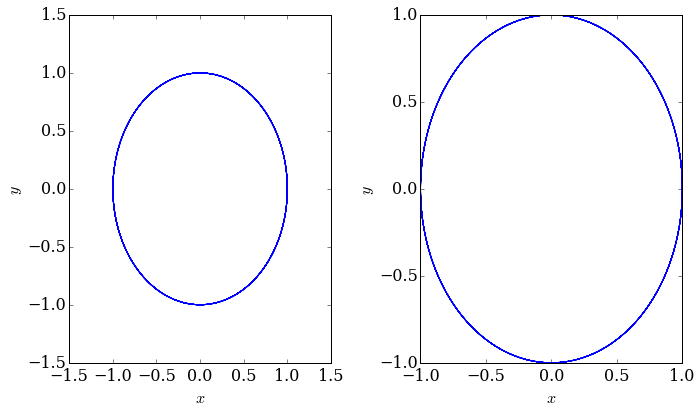

In [7]:
def fn_circular_motion(x, y):
    """Simple function for circular motion example"""
    
    dfdt = np.zeros_like(y)
    dfdt[0] = -y[1]
    dfdt[1] =  y[0]
    
    return dfdt

# Example given above
y0 = np.array([1.0, 0.0])
t_0_1, y_0_1 = ab5_method(fn_circular_motion, 50.0, y0, 500)
t_0_01, y_0_01 = ab5_method(fn_circular_motion, 50.0, y0, 5000)

  
fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(121)
ax1.plot(y_0_1[:, 0], y_0_1[:, 1], 'b-', label = '$h = 0.1$')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax2 = fig.add_subplot(122)
ax2.plot(y_0_01[:, 0], y_0_01[:, 1], 'b-', label = '$h = 0.01$')
ax2.set_xlabel('$x$')
ax2.set_ylabel('$y$')
fig.tight_layout()
plt.show()

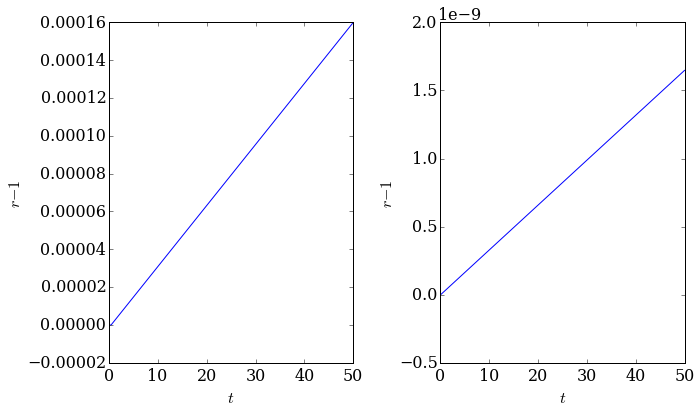

In [8]:
fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(121)
ax1.plot(t_0_1, np.sqrt(y_0_1[:, 0]**2 + y_0_1[:, 1]**2)-1.0, 'b-', label = '$h = 0.1$')
ax1.set_xlabel('$t$')
ax1.set_ylabel('$r - 1$')
ax2 = fig.add_subplot(122)
ax2.plot(t_0_01, np.sqrt(y_0_01[:, 0]**2 + y_0_01[:, 1]**2)-1.0, 'b-', label = '$h = 0.01$')
ax2.set_xlabel('$t$')
ax2.set_ylabel('$r - 1$')
fig.tight_layout()
plt.show()

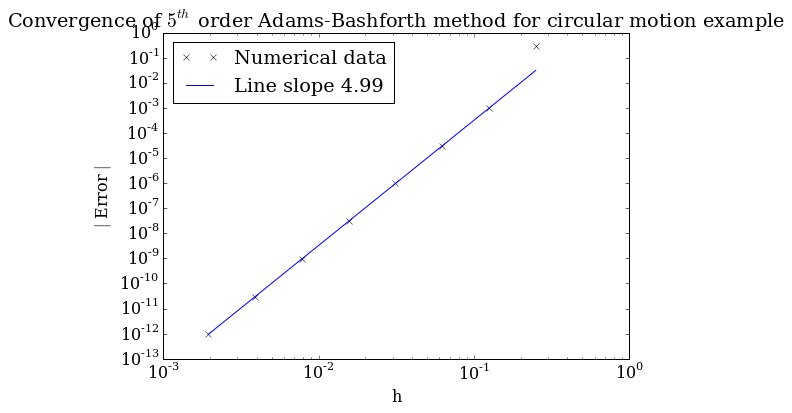

In [9]:
Npoints = np.array([50*2**i for i in range(2, 10)])
h = np.zeros_like(Npoints, float)
h = 50.0 / Npoints
err = np.zeros_like(h)

for i in range(len(Npoints)):
    N = Npoints[i]
    x, y = ab5_method(fn_circular_motion, 50.0, y0, N)
    err[i] = np.abs(y[-1, 0]**2 + y[-1, 1]**2 - 1.0)

# Find the best fit to the data: if err ~ A h^s then the best fit straight line of log(err) vs log(h) has slope s.
p = np.polyfit(np.log(h[1:]), np.log(err[1:]), 1)
    
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.loglog(h, err, 'kx', label = 'Numerical data')
ax.loglog(h, np.exp(p[1])*h**(p[0]), 'b-', label = "Line slope {:.2f}".format(p[0]))
ax.set_xlabel('h')
ax.set_ylabel('$\|$ Error $\|$')
ax.set_title("Convergence of $5^{th}$ order Adams-Bashforth method for circular motion example")
ax.legend(loc = 2)
fig.tight_layout()
plt.show()

Summary
=======

-   The Runge-Kutta Fehlberg method, often known as RK45, is a fourth order method that estimates its own error using a fifth order computation.
-   When combined with adaptive step sizes this is a standard method for solving IVPs to moderate accuracy efficiently. The Matlab command is ode45.
-   The multistep methods estimate the quadrature solution of the IVP, not the derivative.
-   Multistep methods use a (given) number of prior values of the solution at each step.
-   Multistep methods require fewer function evaluations than multistage methods such as Runge-Kutta for the same order of accuracy.
-   It is difficult to use adaptive stepping with multistep methods.